# Evaluation visualization
This notebook is used to visualize the evaluation data generated with the scripts in `evaluate_model.py`.

In [3]:
import os
import numpy as np

import pickle

from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt


In [6]:
os.chdir("/Users/herwig/University/Master/Courses/HS23/Data Science Lab/code/")

In [15]:
with open("results/evaluation/metrics/eqt_metrics_no_res_lstm.pickle", "rb") as f:
    metrics = pickle.load(f)

metrics.keys()

dict_keys(['det_roc', 'det_confusion_matrix', 'det_precision_score', 'det_recall_score', 'det_f1_score', 'p_mu', 'p_std', 'p_MAE', 'p_MAPE', 's_mu', 's_std', 's_MAE', 's_MAPE'])

In [8]:
confusion_matrix = metrics["det_confusion_matrix"]
p_res = metrics["p_res"]
s_res = metrics["s_res"]
snr = metrics["snr"]

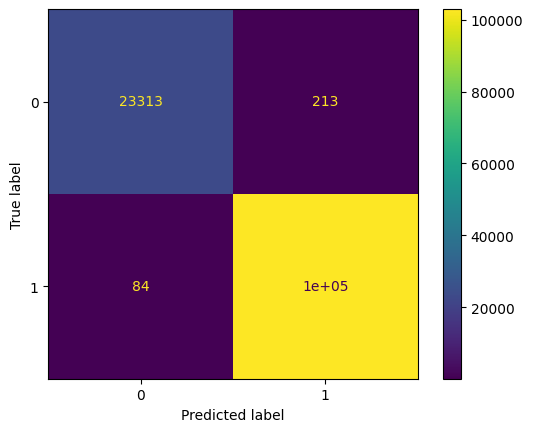

In [9]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
disp.plot()

plt.show()

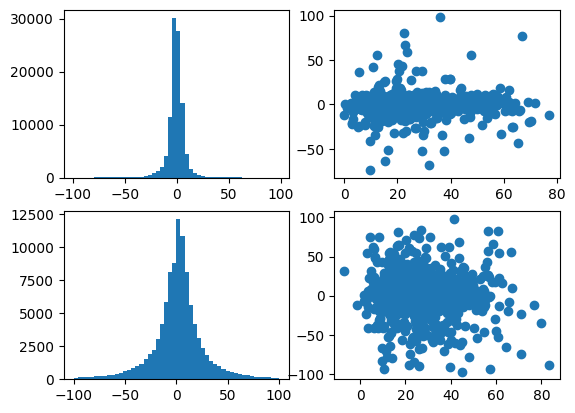

In [10]:
fig, axs = plt.subplots(2, 2)

p_indices = np.abs(p_res) < 100
s_indices = np.abs(s_res) < 100

axs[0, 0].hist(p_res[p_indices], bins=50)
axs[0, 1].scatter(snr[p_indices][::100], p_res[p_indices][::100])
axs[1, 0].hist(s_res[s_indices], bins=50)
axs[1, 1].scatter(snr[s_indices][::100], s_res[s_indices][::100])


plt.show()

In [12]:
for k in ['det_precision_score', 'det_recall_score', 'det_f1_score', 'p_mu', 'p_std', 'p_MAE', 'p_MAPE', 'p_RMSE', 's_mu', 's_std', 's_MAE', 's_MAPE', 's_RMSE']:
    print(f"{k}\t{metrics[k]:>.4f}")

det_precision_score	0.9979
det_recall_score	0.9992
det_f1_score	0.9986
p_mu	-2.3461
p_std	82.9151
p_MAE	8.5045
p_MAPE	0.0140
p_RMSE	6880.4190
s_mu	-2.4927
s_std	125.2675
s_MAE	27.7780
s_MAPE	0.0202
s_RMSE	15698.1588
